# Dataset

## In this notebook, we show how to load a dataset directly and study its probabilistic properties. The dataset information is as follows: 

### [Audiology (Standardized) Data Set](https://archive.ics.uci.edu/ml/datasets/Audiology+%28Standardized%29)


### Data Set Information:

This database is a standardized version of the original audiology database (see audiology.* in this directory). The non-standard set of attributes have been converted to a standard set of attributes according to the rules that follow.

* Each property that appears anywhere in the original .data or .test file has been represented as a separate attribute in this file.

* A property such as age_gt_60 is represented as a boolean attribute with values f and t.

* In most cases, a property of the form x(y) is represented as a discrete attribute x() whose possible values are the various y's; air() is an example. There are two exceptions:
** when only one value of y appears anywhere, e.g. static(normal). In this case, x_y appears as a boolean attribute.
** when one case can have two or more values of x, e.g. history(..). All possible values of history are treated as separate boolean attributes.

* Since boolean attributes only appear as positive conditions, each boolean attribute is assumed to be false unless noted as true. The value of multi-value discrete attributes taken as unknown ("?") unless a value is specified.

* The original case identifications, p1 to p200 in the .data file and t1 to t26 in the .test file, have been added as a unique identifier attribute.

Note: in the original .data file, p165 has a repeated specification of o_ar_c(normal); p166 has repeated specification of speech(normal) and conflicting values air(moderate) and air(mild). No other problems with the original data were noted.



### We download the dataset here

In [1]:
import requests
from os import path
import csv
import numpy as np
import sys
import os
sys.path.insert(0, os.path.abspath('../..'))

%matplotlib inline

fname = 'data/audiology.standardized.data'
if not path.exists('data'):
    os.mkdir('data')
if not path.exists(fname):
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/audiology/audiology.standardized.data'
    r = requests.get(url, allow_redirects=True)
    open(fname, 'wb').write(r.content)


### The dataset can be directly loaded by calling 'genfromtxt' method. All the arguments are the same as [numpy version](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)

### Here we select the first six columns of the dataset. It just need the indices of the columns.  Column names are optional. In case that is not provided in loading time, Discrete Distribution class calls the random variables as X1, X2, etc.

### Note that we use 'converters' to deal with missing values (for more information, refer to [numpy](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) documentation).

In [2]:
from probability.distributions import DiscreteDistribution

# The column names and their indices in csv file that we will load
indices_1 = [0, 1, 2, 3, 4, 5]
names_1 = ["age_gt_60", "air", "airBoneGap", "ar_c", "ar_u", "bone"]
# Convertor for truning missing values (?) to 'N/A'
# Note: the data file loads as byte, so we use b'?' and to make sure
#       everything convert to unicode, we call x.decode("utf-8")
converters = {i: (lambda x: u'N/A' if(x == b'?') else x.decode("utf-8") ) for i in indices_1}
# Load the distribution by genfromtxt
# to see the compelete list of extra argument: 
# https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html
dist = DiscreteDistribution.genfromtxt(fname, 
                                       dtypes="U",
                                       names=names_1,
                                       usecols=indices_1,
                                       delimiter=',',
                                       converters=converters)

### Printing the distribution provides the total number of loaded records, the details of random variables and their levels.

In [3]:
print(dist.summary())

Discrete distribution 
random variables:'['age_gt_60' 'air' 'airBoneGap' 'ar_c' 'ar_u' 'bone']'
levels: 'age_gt_60': {'f', 't'}
'air': {'severe', 'moderate', 'profound', 'mild', 'normal'}
'airBoneGap': {'f', 't'}
'ar_c': {'normal', 'absent', 'elevated', 'N/A'}
'ar_u': {'normal', 'absent', 'elevated', 'N/A'}
'bone': {'unmeasured', 'moderate', 'N/A', 'mild', 'normal'}

total:200
normalised:False



### Or printing the table as a markdown

In [4]:
from IPython.display import Markdown

Markdown(dist.to_table(normalised=True))

|age_gt_60|air      |airBoneGap|ar_c     |ar_u     |bone      |title
|---------|---------|----------|---------|---------|----------|-----------|
|        f|     mild|         f|   absent|   absent|      mild|0.02       |
|        f|     mild|         f|   absent|   absent|    normal|0.01       |
|        f|     mild|         f|   absent| elevated|      mild|0.005      |
|        f|     mild|         f|   absent|   normal|       N/A|0.005      |
|        f|     mild|         f|   absent|   normal|      mild|0.005      |
|        f|     mild|         f| elevated| elevated|       N/A|0.005      |
|        f|     mild|         f| elevated| elevated|      mild|0.01       |
|        f|     mild|         f| elevated|   normal|       N/A|0.005      |
|        f|     mild|         f| elevated|   normal|      mild|0.03       |
|        f|     mild|         f| elevated|   normal|unmeasured|0.01       |
|        f|     mild|         f|   normal| elevated|      mild|0.005      |
|        f|     mild|         f|   normal| elevated|unmeasured|0.005      |
|        f|     mild|         f|   normal|   normal|       N/A|0.055      |
|        f|     mild|         f|   normal|   normal|      mild|0.035      |
|        f|     mild|         f|   normal|   normal|unmeasured|0.005      |
|        f|     mild|         t|   absent|   absent|       N/A|0.005      |
|        f|     mild|         t|   absent|   absent|      mild|0.01       |
|        f|     mild|         t|   absent|   absent|    normal|0.015      |
|        f|     mild|         t|   absent| elevated|    normal|0.005      |
|        f| moderate|         f|   absent|   absent|  moderate|0.005      |
|        f| moderate|         f| elevated| elevated|       N/A|0.005      |
|        f| moderate|         f|   normal|   normal|       N/A|0.005      |
|        f| moderate|         t|   absent|   absent|      mild|0.025      |
|        f| moderate|         t|   absent|   absent|    normal|0.01       |
|        f|   normal|         f|   absent|   absent|    normal|0.005      |
|        f|   normal|         f|   absent| elevated|       N/A|0.005      |
|        f|   normal|         f|   absent| elevated|    normal|0.02       |
|        f|   normal|         f|   absent|   normal|    normal|0.02       |
|        f|   normal|         f| elevated|   absent|       N/A|0.005      |
|        f|   normal|         f| elevated| elevated|       N/A|0.005      |
|        f|   normal|         f| elevated| elevated|    normal|0.01       |
|        f|   normal|         f| elevated|   normal|       N/A|0.015      |
|        f|   normal|         f| elevated|   normal|      mild|0.005      |
|        f|   normal|         f|   normal| elevated|       N/A|0.03       |
|        f|   normal|         f|   normal| elevated|    normal|0.01       |
|        f|   normal|         f|   normal| elevated|unmeasured|0.005      |
|        f|   normal|         f|   normal|   normal|       N/A|0.065      |
|        f|   normal|         f|   normal|   normal|    normal|0.03       |
|        f|   normal|         f|   normal|   normal|unmeasured|0.055      |
|        f| profound|         f|      N/A|      N/A|       N/A|0.005      |
|        f|   severe|         f|      N/A|      N/A|       N/A|0.005      |
|        f|   severe|         f|   normal|   normal|  moderate|0.005      |
|        f|   severe|         t|   absent|   absent|      mild|0.01       |
|        f|   severe|         t|   absent|   absent|    normal|0.015      |
|        t|     mild|         f|   absent|      N/A|       N/A|0.005      |
|        t|     mild|         f|   absent|   absent|      mild|0.015      |
|        t|     mild|         f|   absent| elevated|      mild|0.005      |
|        t|     mild|         f|   absent|   normal|      mild|0.01       |
|        t|     mild|         f| elevated|   absent|      mild|0.005      |
|        t|     mild|         f| elevated| elevated|       N/A|0.005      |
|        t|     mild|         f|   normal|   absent|      mild|0.015      |
|        t|     mild|         f|   normal| elevated|       N/A|0.005      |
|        t|     mild|         f|   normal| elevated|      mild|0.015      |
|        t|     mild|         f|   normal| elevated|unmeasured|0.01       |
|        t|     mild|         f|   normal|   normal|       N/A|0.09       |
|        t|     mild|         f|   normal|   normal|      mild|0.03       |
|        t|     mild|         f|   normal|   normal|unmeasured|0.04       |
|        t|     mild|         t|      N/A|   absent|      mild|0.01       |
|        t| moderate|         f| elevated|   normal|unmeasured|0.005      |
|        t| moderate|         f|   normal| elevated|       N/A|0.005      |
|        t| moderate|         f|   normal|   normal|       N/A|0.01       |
|        t| moderate|         f|   normal|   normal|  moderate|0.005      |
|        t| moderate|         t| elevated|   absent|      mild|0.005      |
|        t| moderate|         t|   normal|   absent|      mild|0.005      |
|        t|   normal|         f|   absent|   absent|    normal|0.015      |
|        t|   normal|         f|   absent|   normal|    normal|0.005      |
|        t|   normal|         f| elevated|   normal|       N/A|0.015      |
|        t|   normal|         f| elevated|   normal|    normal|0.005      |
|        t|   normal|         f|   normal| elevated|    normal|0.005      |
|        t|   normal|         f|   normal|   normal|       N/A|0.015      |
|        t|   normal|         f|   normal|   normal|    normal|0.005      |
|        t|   normal|         f|   normal|   normal|unmeasured|0.015      |
|        t|   severe|         f|   normal|   normal|       N/A|0.005      |


### We can directly access the random variables details from 'rvs' variable or random variable names.

In [5]:
print(f"Random variables: {dist.names}")
print(f"\nDetails: \n{dist.rvs}")

Random variables: ['age_gt_60' 'air' 'airBoneGap' 'ar_c' 'ar_u' 'bone']

Details: 
'age_gt_60': {'f', 't'}
'air': {'severe', 'moderate', 'profound', 'mild', 'normal'}
'airBoneGap': {'f', 't'}
'ar_c': {'normal', 'absent', 'elevated', 'N/A'}
'ar_u': {'normal', 'absent', 'elevated', 'N/A'}
'bone': {'unmeasured', 'moderate', 'N/A', 'mild', 'normal'}



### Also, we can access the value of the random variables (as tuple) and its frequency by looping over the distribution itself. 

In [6]:
# print the first three values
for t in dist[:3]:
    print(t)

(('f', 'mild', 'f', 'normal', 'normal', 'N/A'), 11)
(('f', 'moderate', 'f', 'normal', 'normal', 'N/A'), 1)
(('t', 'mild', 't', 'N/A', 'absent', 'mild'), 2)


### To get the frequency, we need to use the value of the random variable. Calling the frequency method or using the indexer of the distribution return the frequency.

In [7]:
rv_value = ('t', 'mild', 't', 'N/A', 'absent', 'mild')
# By calling the frequency method
print("Frequency: ", dist.frequency(rv_value))
# By indexre
print("Frequency: ", dist[rv_value])

Frequency:  2
Frequency:  2


### Or get probability instead of frequency

In [8]:
rv_value = ('t', 'mild', 't', 'N/A', 'absent', 'mild')
# By calling the frequency method
print("Probability: ", dist.frequency(rv_value, normalised=True))
# By calling the frequency method
print("Probability: ", dist.probability(rv_value))

Probability:  0.01
Probability:  0.01


### Both "FrequencyTable" and "DiscreteDistribution" classes return zero frequency/probability when the value of random variable is not observed.
### We can also check occurrence of random variable value too

In [9]:
not_observed_value = ('t', 'mild', 'f', 'N/A', 'absent', 'mild')

print("Is it obsrved:", not_observed_value in dist)
print("Frequency: ", dist[not_observed_value])
print("Frequency: ", dist.frequency(not_observed_value))
print("probability: ", dist.frequency(not_observed_value, normalised=True))
print("probability: ", dist.probability(not_observed_value))

Is it obsrved: False
Frequency:  0
Frequency:  0
probability:  0.0
probability:  0.0


# How to marginalise

### Calling marginal method returns another DiscreteDistribution object that is marginalised over the requested random variables.

In [10]:
marginal_dist_1 = dist.marginal(["age_gt_60", "airBoneGap", "ar_c", "ar_u", "bone"])
print(marginal_dist_1.summary())
print("The frequencies:")
for item in marginal_dist_1.items():
    print(item)

Discrete distribution 
random variables:'['air']'
levels: 'air': {'severe', 'profound', 'moderate', 'mild', 'normal'}

total:200
normalised:False

The frequencies:
('mild', 101)
('moderate', 17)
('severe', 8)
('normal', 73)
('profound', 1)


### Plotting the distribution

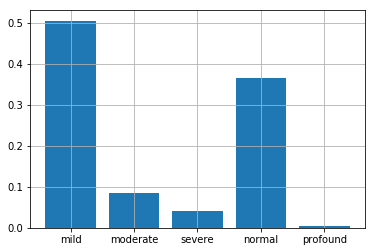

In [11]:
import matplotlib.pyplot as plt

plt.bar([ level for level in marginal_dist_1], 
        [marginal_dist_1.probability(level) for level in marginal_dist_1])
plt.grid()
plt.show()

### Or 

In [12]:
marginal_dist_2 = dist.marginal(["age_gt_60", "airBoneGap", "ar_c", "ar_u"])
print(marginal_dist_2.summary())
print("The frequencies:")
for item in marginal_dist_2.items():
    print(item)

Discrete distribution 
random variables:'['air' 'bone']'
levels: 'air': {'severe', 'moderate', 'profound', 'mild', 'normal'}
'bone': {'unmeasured', 'moderate', 'N/A', 'mild', 'normal'}

total:200
normalised:False

The frequencies:
(('mild', 'N/A'), 36)
(('moderate', 'N/A'), 5)
(('mild', 'mild'), 45)
(('severe', 'N/A'), 2)
(('severe', 'moderate'), 1)
(('normal', 'mild'), 1)
(('normal', 'N/A'), 31)
(('normal', 'normal'), 26)
(('moderate', 'mild'), 7)
(('severe', 'mild'), 2)
(('moderate', 'moderate'), 2)
(('mild', 'normal'), 6)
(('moderate', 'normal'), 2)
(('moderate', 'unmeasured'), 1)
(('normal', 'unmeasured'), 15)
(('mild', 'unmeasured'), 14)
(('profound', 'N/A'), 1)
(('severe', 'normal'), 3)


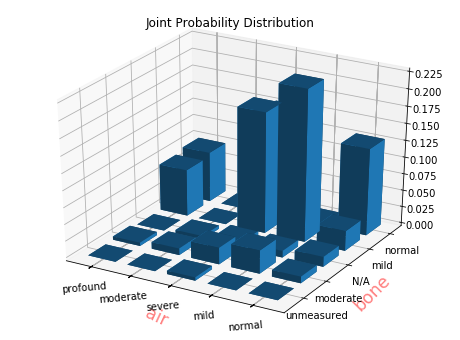

In [12]:
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111, projection='3d')

level1 = list(marginal_dist_2.rvs[0].levels)
level2 = list(marginal_dist_2.rvs[1].levels)
top = np.zeros((len(level1)*len(level2)))
for i, l1 in enumerate(level1):
    for j, l2 in enumerate(level2):
        top[i*len(level1) + j] = marginal_dist_2.probability((l1, l2))

        
_l1_nums, _l2_nums = np.meshgrid(np.arange(len(level1)), np.arange(len(level2)))
x, y = _l1_nums.ravel(), _l2_nums.ravel()



        

bottom = np.zeros_like(top)
width = depth = .7
ax1.bar3d(x, y+.5, bottom, width, depth, top, shade=True)

ax1.set_xticklabels(level1, rotation=5)
ax1.set_xticks(x+.3) 
ax1.set_xlabel(marginal_dist_2.rvs[0].name, fontsize='xx-large', rotation=-25, color = 'r', alpha=.5)


ax1.set_yticklabels(level2)
ax1.set_ylabel(marginal_dist_2.rvs[1].name, fontsize='xx-large', rotation=45, color = 'r', alpha=.5)
#ax1.set_yticks(y+.5)

ax1.set_title('Joint Probability Distribution')




plt.show()

# How to condition on random variables

In [13]:
dist_condiational = dist.condition_on(["age_gt_60", "airBoneGap", "ar_c", "ar_u", "bone"])
print(dist_condiational.summary())

NameError: name 'DiscreteConditionalDistribution' is not defined

In [14]:
it = iter(dist_condiational)

given_1 = next(it)
for i in range(3):
    next(it)
given_2 = next(it)


# Plot the first distribution
dist1 = dist_condiational[given_1]
plt.bar([ level for level in dist1], 
        [dist1.probability(s) for s in dist1])
plt.grid()
plt.title(f"Given: \n{tuple(dist_condiational.conditional_rvs.names)}:{given_1}")
plt.show()

# Plot the second distribution
plt.bar([ level for level in dist_condiational[given_2]],
        [dist_condiational.probability(s, given_2) for s in dist_condiational[given_2]])
plt.grid()
plt.title(f"Given: \n{tuple(dist_condiational.conditional_rvs.names)}:{given_2}")
plt.show()

NameError: name 'dist_condiational' is not defined